#Directors Graph creation and visualization

Create a directors graph, where nodes are the directors and edges connect directors having a movie in the same decade (e.g. 1980-1989).

Download dataset

In [1]:
import requests
import zipfile
import os

def download_and_extract_zip(url):
    # Send an HTTP GET request to the URL
    response = requests.get(url)

    if response.status_code == 200:
        # Request was successful, save the content to a local .zip file
        with open("downloaded_file.zip", "wb") as file:
            file.write(response.content)

        # Extract the .zip file
        with zipfile.ZipFile("downloaded_file.zip", 'r') as zip_ref:
            zip_ref.extractall()  # Extract the contents of the zip file to the current directory

        # Remove the downloaded .zip file
        os.remove("downloaded_file.zip")

        print(f"File extracted and saved.")
    else:
        print(f"Failed to download the .zip file. Status code: {response.status_code}")

# Usage
download_and_extract_zip("http://mozart.diei.unipg.it/gdcontest/contest2021/data/uploads/movie_remakes.zip")


File extracted and saved.


In [2]:
import pandas as pd
remakes_edges_df = pd.read_csv('remakes_edges.csv', encoding='latin-1', delimiter=';', error_bad_lines=False)
remakes_edges_df

<ipython-input-2-265a90e65092>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  remakes_edges_df = pd.read_csv('remakes_edges.csv', encoding='latin-1', delimiter=';', error_bad_lines=False)


director_original  director_remake                  title_original  \
0                    1               86                        Don Juan   
1                   48               46                    Pépé le Moko   
2                   56               20  All Quiet on the Western Front   
3                   45               42          Assault on Precinct 13   
4                   37               30                   Little Mother   
..                 ...              ...                             ...   
97                  33               12            The More the Merrier   
98                  32               21                       The Women   
99                  32               17                       The Women   
100                  8               63         The Major and the Minor   
101                 26               62      The Shop Around the Corner   

     year_original                    title_remake  year_remake  
0             1926          Adventures of Don Juan         1948  
1             1937                         Algiers         1938  
2             1930  All Quiet on the Western Front         1979  
3             1976          Assault on Precinct 13         2005  
4             1935                 Bachelor Mother         1939  
..             ...                             ...          ...  
97            1943                  Walk Don't Run         1966  
98            1939                       The Women         2008  
99            1939                The Opposite Sex         1956  
100           1942          You're Never Too Young         1955  
101           1940                     Pillow Talk         1959  

[102 rows x 6 columns]

In [3]:
import pandas
remakes_nodes_df = pd.read_csv('remakes_nodes.csv', encoding='latin-1', delimiter=';', error_bad_lines=False)
remakes_nodes_df

<ipython-input-3-7755e794e150>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  remakes_nodes_df = pd.read_csv('remakes_nodes.csv', encoding='latin-1', delimiter=';', error_bad_lines=False)


id                name
0    1       Alan Crosland
1    2    Alfred Hitchcock
2    3        Andrew Davis
3    4       Andrew Grieve
4    5     Anthony Asquith
..  ..                 ...
86  87      W. S. Van Dyke
87  88      Wilhelm Thiele
88  89  William A. Wellman
89  90        William Nigh
90  91          Wolf Rilla

[91 rows x 2 columns]

#### Graph creation

Directors graph, where nodes are the directors and edges connect directors having a movie in the same decade (e.g. 1980-1989).

In [5]:
names = {}
# Add edges for movies directed by the same director
for id, name in zip(remakes_nodes_df['id'],remakes_nodes_df['name']):
    names[id] = name

In [7]:
import math

# Get the lowest and largest years from your data
lowest_year = min(remakes_edges_df[['year_original', 'year_remake']].min())
largest_year = max(remakes_edges_df[['year_original', 'year_remake']].max())


# Create a list of decades within the range
decades = range((lowest_year // 10) * 10, ((largest_year // 10) + 1) * 10, 10)

# Create a dictionary to map decades to directors
decade_directors_map = {}

# Iterate through each decade
for decade in decades:
    # Extract unique directors from both columns for the current decade
    directors = remakes_edges_df[(remakes_edges_df['year_original'] // 10 * 10 == decade) | (remakes_edges_df['year_remake'] // 10 * 10 == decade)][['director_original', 'director_remake']].values.ravel()
    unique_directors = set(director for director in directors)

    # Store the list of unique directors in the dictionary
    decade_directors_map[decade] = list(unique_directors)

# Print the mapping of decades to directors
for decade, directors in decade_directors_map.items():
    print(f"Decade: {decade} - {decade+9}  - Directors: {directors}")

Decade: 1910 - 1919  - Directors: [32, 90, 59, 60]
Decade: 1920 - 1929  - Directors: [1, 65, 2, 34, 38, 40, 44, 46, 48, 18, 86, 56, 89, 90, 59]
Decade: 1930 - 1939  - Directors: [2, 5, 6, 8, 9, 10, 11, 15, 17, 20, 21, 22, 23, 25, 27, 30, 31, 32, 34, 36, 37, 38, 39, 41, 46, 47, 48, 49, 52, 53, 55, 56, 59, 61, 63, 65, 68, 69, 70, 71, 72, 74, 77, 84, 87, 88, 89]
Decade: 1940 - 1949  - Directors: [1, 2, 4, 8, 12, 14, 17, 26, 28, 30, 32, 33, 34, 36, 37, 39, 44, 50, 52, 54, 56, 58, 61, 62, 63, 66, 70, 75, 76, 78, 81, 85, 86, 89]
Decade: 1950 - 1959  - Directors: [2, 3, 8, 12, 13, 17, 26, 29, 30, 32, 34, 37, 39, 40, 43, 45, 46, 48, 56, 57, 62, 63, 69, 71, 72, 76, 82, 83, 87]
Decade: 1960 - 1969  - Directors: [2, 5, 7, 8, 11, 12, 15, 17, 23, 30, 32, 33, 35, 37, 45, 47, 48, 49, 55, 56, 62, 64, 67, 71, 72, 74, 81, 88, 91]
Decade: 1970 - 1979  - Directors: [2, 6, 8, 10, 16, 19, 20, 22, 23, 24, 27, 28, 32, 37, 39, 42, 45, 46, 49, 51, 54, 56, 60, 64, 71, 73, 74, 80, 84, 87]
Decade: 1980 - 1989  - D

In [8]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes for directors
for directors in decade_directors_map.values():
    for director in directors:
        G.add_node(names[director])

# Add edges for directors who worked in the same decade
for decade, directors in decade_directors_map.items():
    for i, director1 in enumerate(directors):
        for director2 in directors[i + 1:]:
            # Add an edge if both directors worked in the same decade
            G.add_edge(names[director1], names[director2], decade=decade)


## Graph visualisation

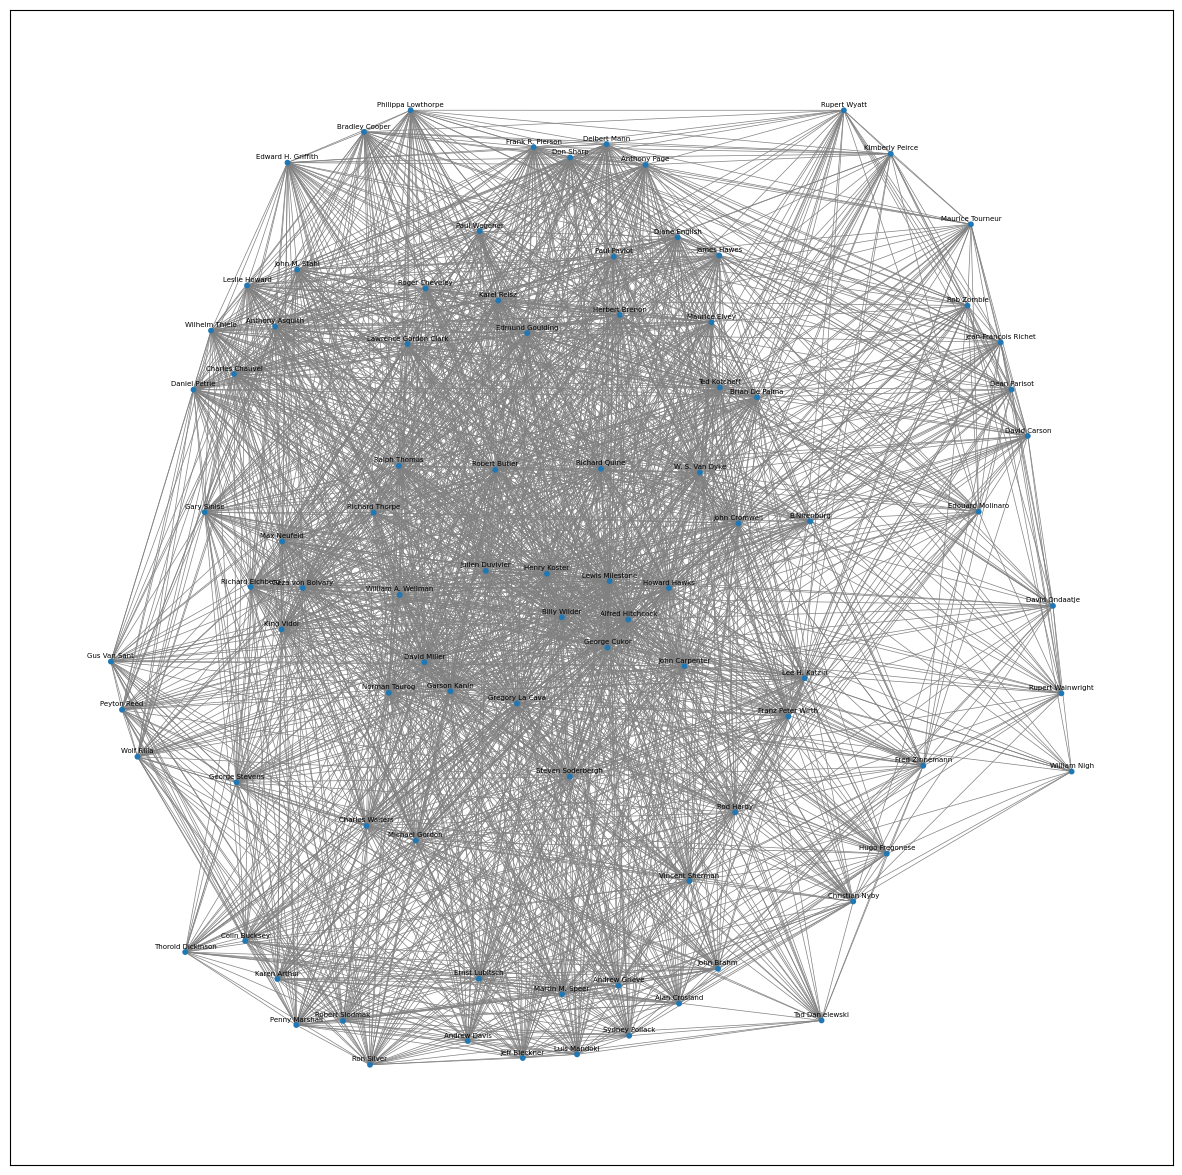

In [9]:
import matplotlib.pyplot as plt


def plot_graph_networkx(G, pos, node_size=10, node_label_size = 5, show_edge_labels = False, edge_label_size=4):
    # node_colors = [G.nodes[node]['color'] for node in G.nodes()]
    plt.figure(figsize=(15, 15))  # Adjust the figure size as needed
    ax = plt.gca()
    ax.set_facecolor('white')

    # Define a colormap for coloring components
    cmap = plt.get_cmap('tab20')

    components = list(nx.connected_components(G))

    # Create a dictionary to map nodes to colors
    node_colors = {}
    for i, component in enumerate(components):
        color = cmap(i % 87)  # You can adjust the number of colors as needed
        for node in component:
            node_colors[node] = color

    # Draw nodes with desired node color
    # nx.draw_networkx_nodes(G, pos,  node_color=node_colors, node_size=10)
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color = [node_colors[node] for node in G.nodes()])

    # Draw edges with a specific edge width and color
    nx.draw_networkx_edges(G, pos, width=0.5, edge_color='grey')

    # Add labels for nodes
    node_labels = {node: data.get("label", "") for node, data in G.nodes(data=True)}
    nx.draw_networkx_labels(G, {k: (x, y + 0.01) for k, (x, y) in pos.items()}, font_size=node_label_size)

    # # Add labels for edges
    if show_edge_labels:
        edge_labels = {(u, v): data.get("label", "") for u, v, data in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=edge_label_size, font_color='red')

    # Turn off axis labels and display the plot
    ax.set_xticks([])  # Turn off x-axis labels
    ax.set_yticks([])  # Turn off y-axis labels
    plt.show()

pos = nx.kamada_kawai_layout(G)
plot_graph_networkx(G, pos)

#### Interactive Graph visualisation using Plotly

In [10]:
import plotly.graph_objects as go


node_x = []
node_y = []

for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)

edge_x = []
edge_y = []

for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.25, color='#888'),
    hoverinfo='text',
    mode='lines')

node_trace = go.Scatter(
    x=[pos[node][0] for node in G.nodes()],
    y=[pos[node][1] for node in G.nodes()],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=False,  # Do not use a colorscale
        size=5,
        colorbar=dict(
            thickness=15,
            title='Node Department',
            xanchor='left',
            titleside='right'
        )
    )
)

# Add node labels if you want
node_text = list(G.nodes())
node_trace.text = node_text
layout = go.Layout(
    showlegend=False,
    hovermode='closest',
    margin=dict(b=0, l=0, r=0, t=0),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    # width=20*40,  # 20 by 20 figure size (20 units per inch)
    height=20*40,
)

fig = go.Figure(data=[edge_trace, node_trace], layout=layout)
fig.show()

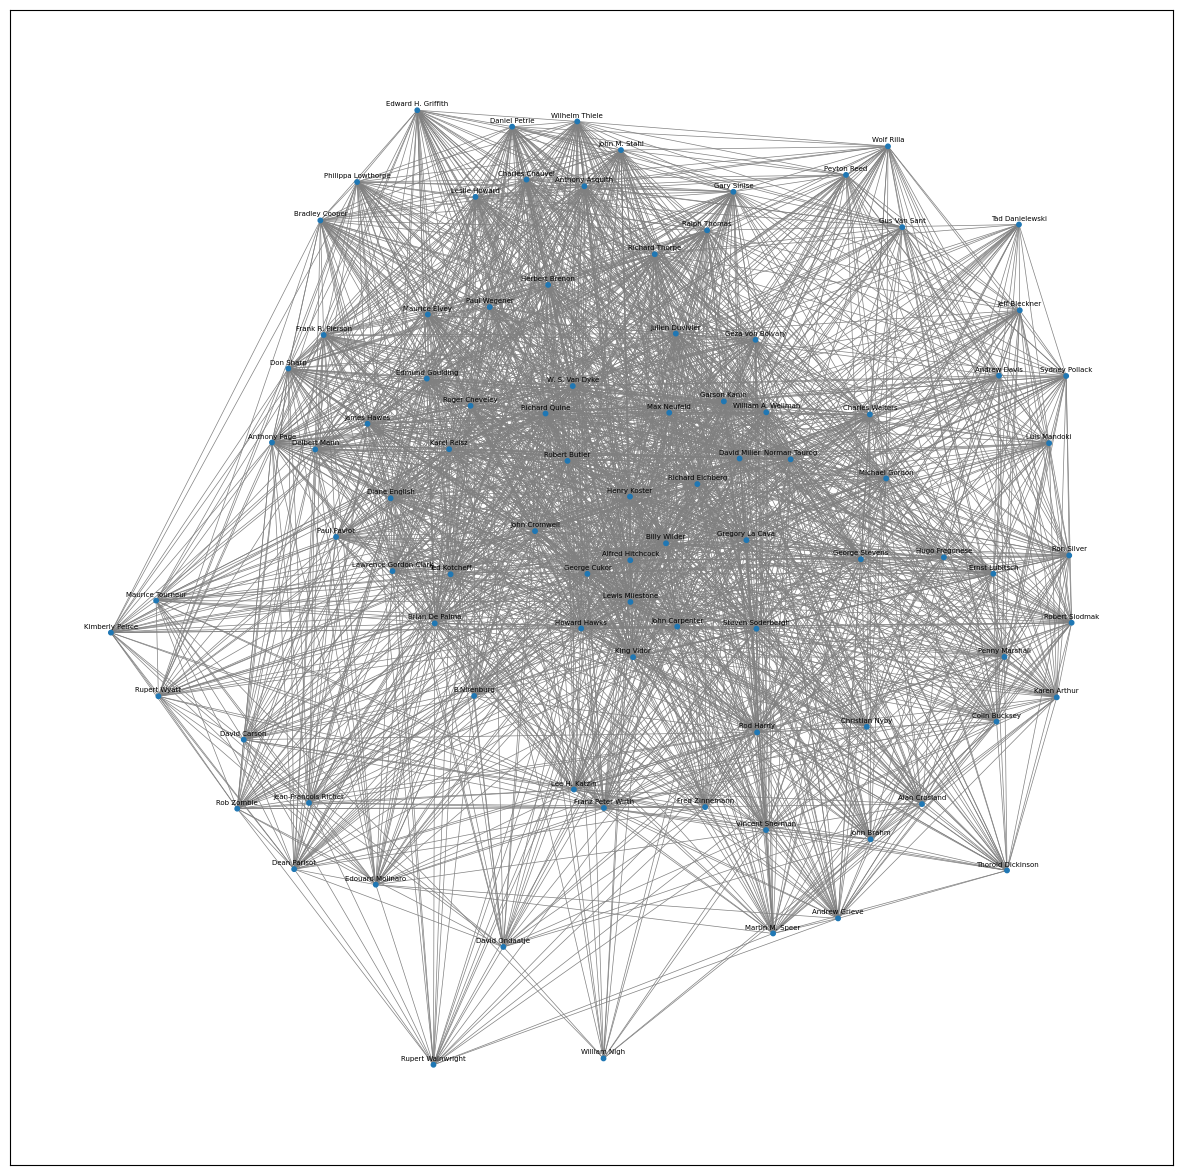

In [12]:
pos = nx.spring_layout(G)
plot_graph_networkx(G, pos)

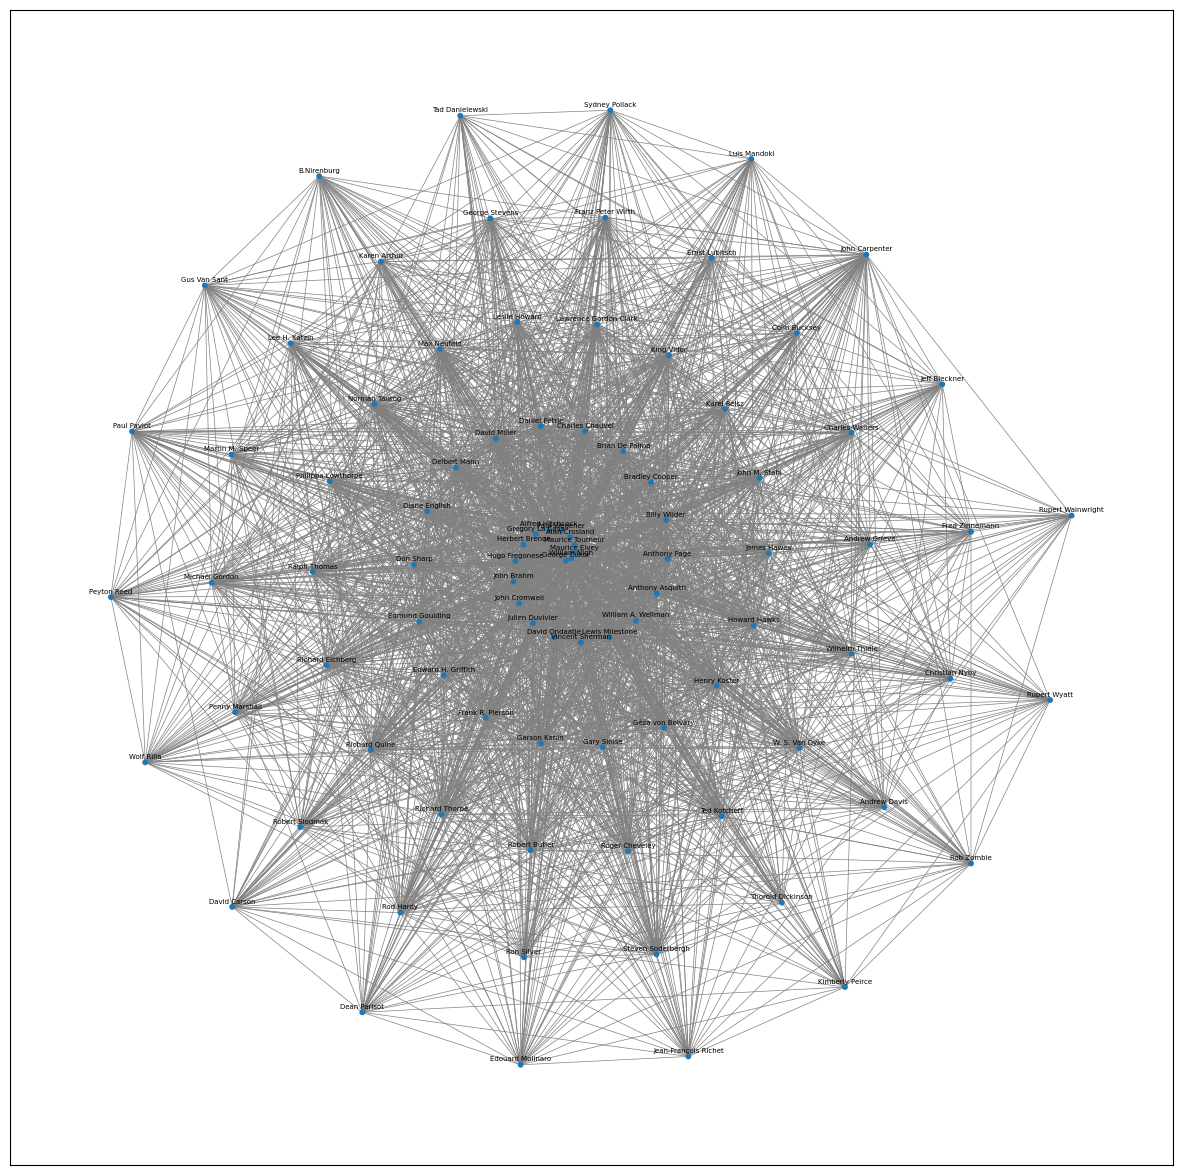

In [13]:
pos = nx.spiral_layout(G)
plot_graph_networkx(G, pos)

Visualising a random sample of the graph of 25 nodes

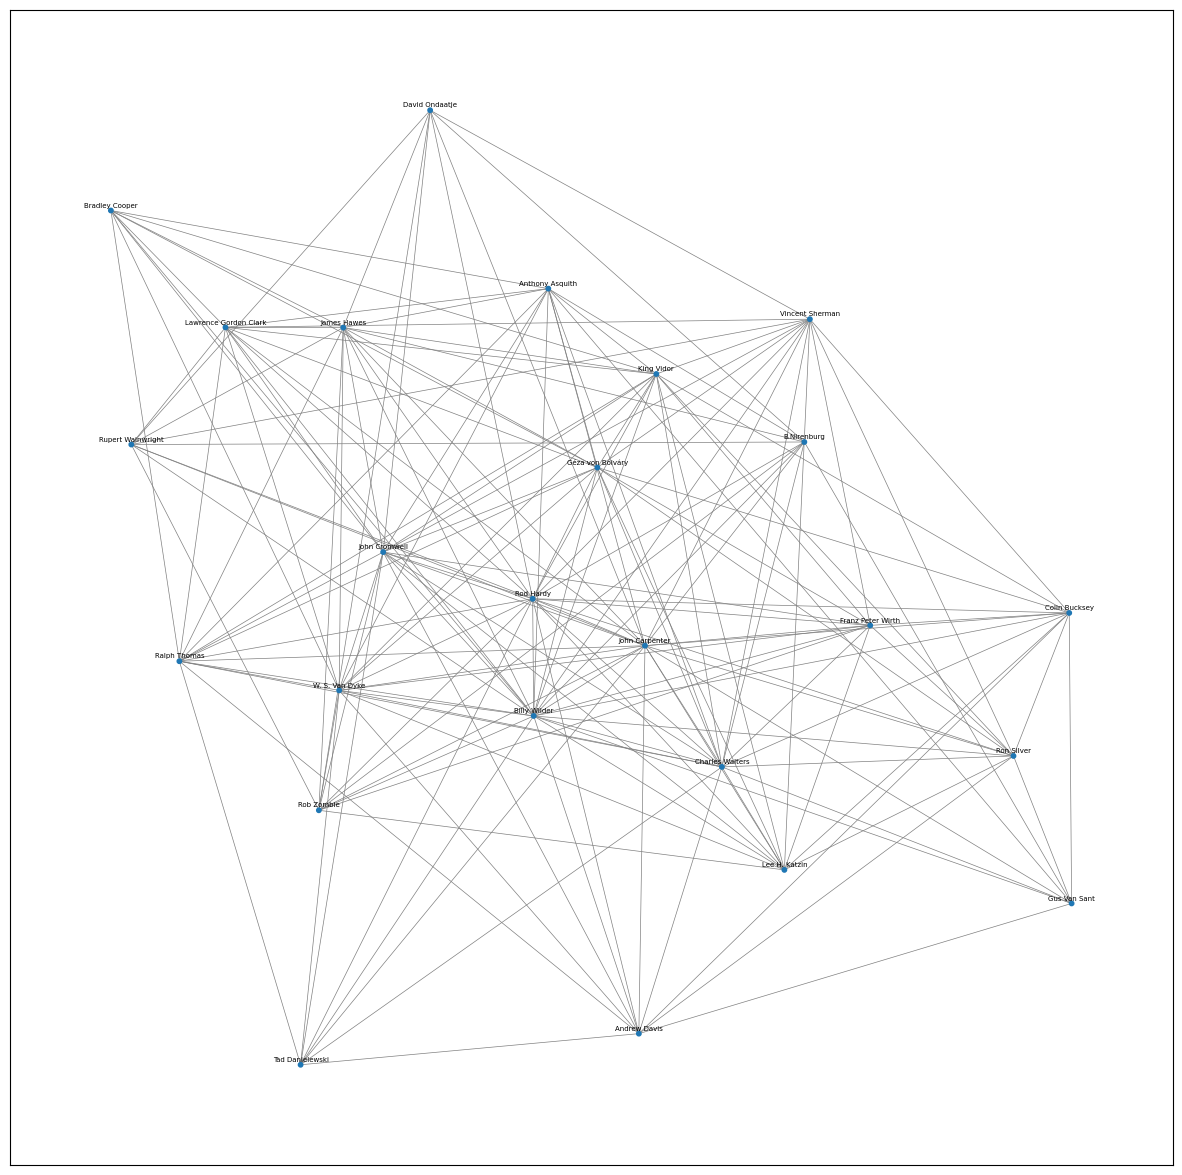

In [15]:
import random

subgraph_nodes = random.sample(list(G.nodes()), k=25)  # Adjust the number of nodes as needed
subgraph = G.subgraph(subgraph_nodes)

pos = nx.spring_layout(subgraph)
plot_graph_networkx(subgraph, pos)

#### Characteristics of the network

In [11]:
# Characteristics of the network
print(f"Nodes : {G.number_of_nodes()}")
print(f"Edges : {G.number_of_edges()}")

# Find connected components
connected_components = list(nx.connected_components(G))

print(f"Number of connected components : {len(connected_components)}")


degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
max_degree = max(degree_sequence)
min_degree = min(degree_sequence)
average_degree = sum(degree_sequence) / len(degree_sequence)
print(f"Max Degree: {max_degree}")
print(f"Min Degree: {min_degree}")
print(f"Average Degree: {average_degree:.2f}")

# Connected Components
components = list(nx.connected_components(G))
largest_component = max(components, key=len)
num_connected_components = len(components)
print(f"Size of Largest Component: {len(largest_component)}")
print(f"Number of Connected Components: {num_connected_components}")

# degree assortativity coefficient
degree_assortativity = nx.degree_assortativity_coefficient(G)
print(f"Degree Assortativity Coefficient: {degree_assortativity:.4f}")

# Calculate the average clustering coefficient
average_clustering = nx.average_clustering(G)
print("Average Clustering Coefficient:", average_clustering)

Nodes : 91
Edges : 2460
Number of connected components : 1
Max Degree: 90
Min Degree: 16
Average Degree: 54.07
Size of Largest Component: 91
Number of Connected Components: 1
Degree Assortativity Coefficient: -0.1054
Average Clustering Coefficient: 0.7982212099655505
